In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
#plt.style.use('./deeplearning.mplstyle')

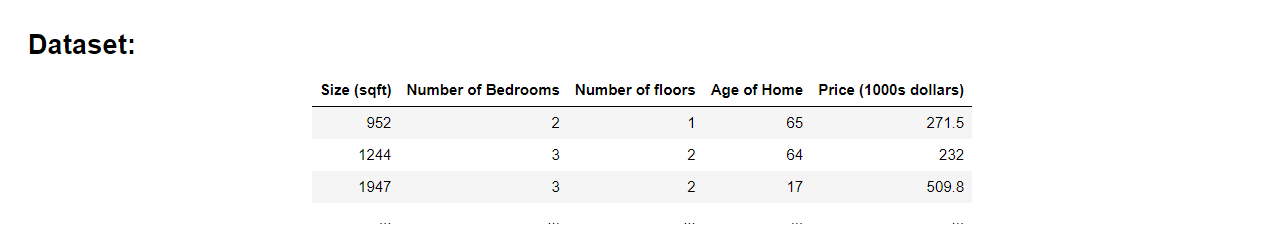

In [ ]:
# X_train=np.array([[952,2,1,65],[1244,3,2,64],[1947,3,2,17,]])
# y_train=np.array([271.5,232,509.8])
# X_features = ['size(sqft)','bedrooms','floors','age']

In [25]:
import numpy as np

# Number of samples
n_samples = 100

# Generate random values for the features
np.random.seed(0)  # For reproducibility
size = np.random.randint(500, 3000, n_samples)  # size in sqft
bedrooms = np.random.randint(1, 6, n_samples)   # number of bedrooms
floors = np.random.randint(1, 4, n_samples)     # number of floors
age = np.random.randint(0, 100, n_samples)      # age of the property

# Combine the features into the X_train array
X_train = np.column_stack((size, bedrooms, floors, age))

# Generate prices based on the features with some added noise
price = (
    size * 0.1 +       # Price increases with size
    bedrooms * 10 +    # Each bedroom adds a bit to the price
    floors * 5 +       # Each floor adds a bit to the price
    age * (-2) +       # Older properties decrease in price
    np.random.normal(0, 50, n_samples)  # Add some random noise
)

# Ensure no negative prices
price = np.clip(price, a_min=0, a_max=None)

# Set y_train to the generated prices
y_train = price
X_features = ['size(sqft)','bedrooms','floors','age']
# Print the first few rows to verify
print("X_train (first 5 rows):")
print(X_train[:5])
print("\ny_train (first 5 values):")
print(y_train[:5])


X_train (first 5 rows):
[[2153    4    2   36]
 [1335    4    2   25]
 [1263    3    3   32]
 [2231    4    3   42]
 [1533    5    3   14]]

y_train (first 5 values):
[306.27 131.39  59.5  176.8  167.12]


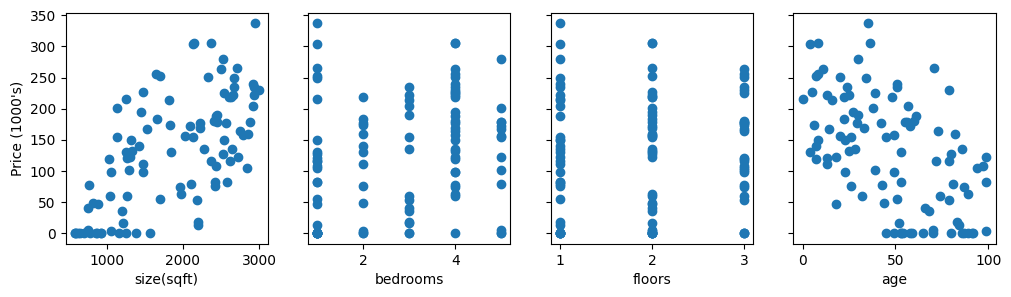

In [26]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [27]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (100, 4), X Type:<class 'numpy.ndarray'>)
[[2153    4    2   36]
 [1335    4    2   25]
 [1263    3    3   32]
 [2231    4    3   42]
 [1533    5    3   14]
 [ 777    2    1   86]
 [2278    3    2   28]
 [2328    4    3   20]
 [2862    2    2   82]
 [1205    3    2   68]
 [2635    2    2   22]
 [2722    5    2   99]
 [2201    3    1   83]
 [1037    4    3    7]
 [2620    1    3   72]
 [2440    4    1   61]
 [2663    3    2   13]
 [1476    4    2    5]
 [1255    1    1    0]
 [2546    1    1    8]
 [2371    1    1   79]
 [2996    4    3   79]
 [ 599    3    2   53]
 [2508    4    3   11]
 [1255    1    2    4]
 [1297    5    3   39]
 [1159    1    1   92]
 [ 923    1    3   45]
 [1139    3    1   26]
 [1044    4    2   74]
 [1214    3    2   52]
 [2792    4    2   49]
 [ 651    1    1   91]
 [1707    1    1   51]
 [2576    1    1   99]
 [1302    4    1   18]
 [2676    1    1   34]
 [2676    3    1   51]
 [2456    3    2   30]
 [2425    1    1   53]
 [1256    5    3   58]
 [ 773

In [28]:
#Taking optimal w and b
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [29]:
#Calculate cost
def compute_cost(X,y,w,b):
  m=X.shape[0]
  cost=0.0
  for i in range(m):
    f_wb=np.dot(X[i],w)+b
    cost+=(f_wb-y[i])**2
  total_cost=cost/(2*m)
  return total_cost

In [30]:
optimal_cost=compute_cost(X_train,y_train,w_init,b_init)
print(f'Optimal w:{w_init}, Optimal b:{b_init}, Optimal cost:{optimal_cost}')

Optimal w:[  0.39  18.75 -53.36 -26.42], Optimal b:785.1811367994083, Optimal cost:266541.0916974926


# GRADIENT DESCENT


In [31]:
def compute_gradient(X, y, w, b):
  m,n = X.shape
  dj_dw = np.zeros((n,))
  dj_db = 0.

  for i in range(m):
    err = (np.dot(X[i], w) + b) - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * X[i, j]
      dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

  return dj_db,dj_dw

In [32]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 39.960251267557844
dj_dw at initial w,b: 
 [1.42e+04 1.99e+01 9.99e+00 6.55e+01]


In [33]:
import copy,math
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
# An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

In [44]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 3e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 12372.26   
Iteration  100: Cost  3698.46   
Iteration  200: Cost  2368.75   
Iteration  300: Cost  2575.12   
Iteration  400: Cost  2938.15   
Iteration  500: Cost  3200.93   
Iteration  600: Cost  3359.59   
Iteration  700: Cost  3448.95   
Iteration  800: Cost  3497.69   
Iteration  900: Cost  3523.84   
b,w found by gradient descent: 0.00,[9.60e-02 1.33e-04 6.91e-05 2.96e-04] 
prediction: 206.60, target value: 306.2654475345426
prediction: 128.11, target value: 131.38714241696786
prediction: 121.20, target value: 59.50274997536116
prediction: 214.09, target value: 176.8009112150307
prediction: 147.11, target value: 167.1202012676953
prediction: 74.58, target value: 0.0
prediction: 218.60, target value: 134.7601492777688
prediction: 223.39, target value: 250.9630997100166
prediction: 274.65, target value: 160.02532689826876
prediction: 115.65, target value: 36.10905181001379
prediction: 252.85, target value: 219.63419655173186
prediction: 261.22, target value: 1

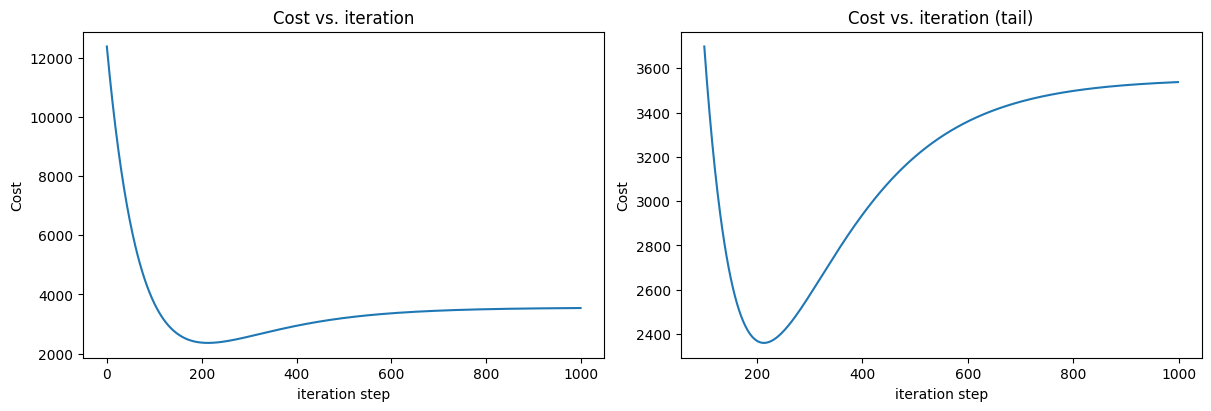

In [45]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

In [46]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

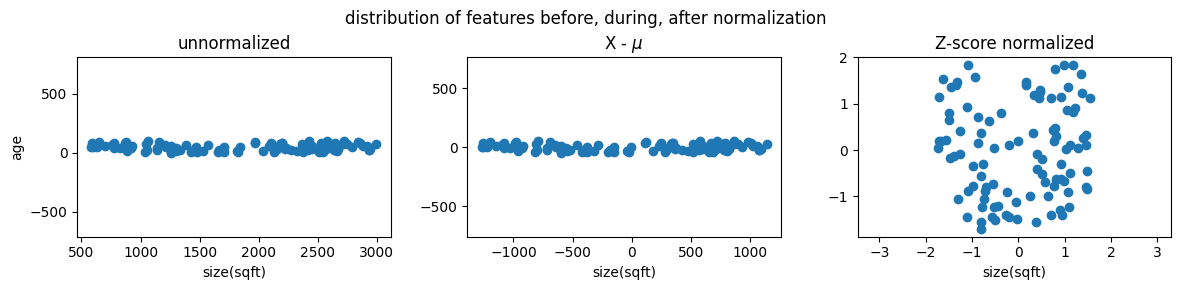

In [47]:
mu     = np.mean(X_train,axis=0)
sigma  = np.std(X_train,axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [48]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1852.91    2.92    1.93   47.66], 
X_sigma = [734.7    1.44   0.78  28.13]
Peak to Peak range by column in Raw        X:[2412    4    2   99]
Peak to Peak range by column in Normalized X:[3.28 2.78 2.57 3.52]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

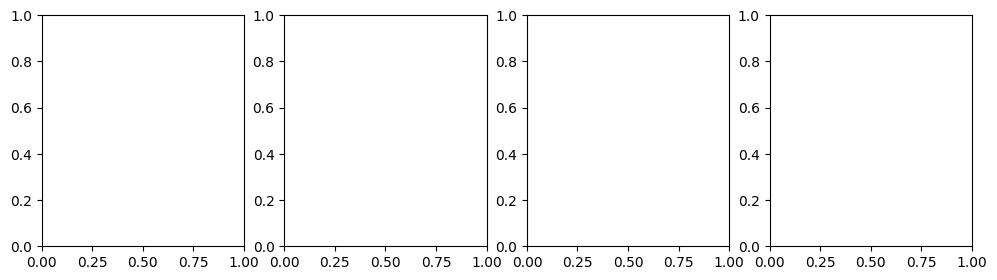

In [68]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
  ax[i].bar(X_train[:,i],)
  ax[i].set_xlabel(X_features[i]);
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
ax[0].set_ylabel("count");
fig,ax=plt.subplots(1,4,figsize=(12,3))
fig.suptitle("distribution of features after normalization")
for i in range(len(ax)):
  ax[i].bar(X_norm[:,i], X_norm[:,i])
  ax[i].set_xlabel(X_features[i]);
ax[0].set_ylabel("count");
plt.show()